# 연결

In [0]:
from google.colab import drive
drive.mount("/gdrive", force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
cd /gdrive/My\ Drive/19-1

/gdrive/My Drive/19-1


In [0]:
!ls

 all_embbeding_df_v2.pickle	     'gbm_['\''bert'\'']_cv1_L1.pickle'
 all_for_all.ipynb		     'gbm_['\''bert'\'']_cv1_L2.pickle'
'['\''bert'\'']_cv1_L1.png'	     'gbm_['\''bert'\'']_cv2_L1.pickle'
'['\''bert'\'']_cv1_L2.png'	     'gbm_['\''bert'\'']_cv2_L2.pickle'
'['\''bert'\'']_cv2_L1.png'	     'gbm_['\''bert'\'']_cv3_L1.pickle'
'['\''bert'\'']_cv2_L2.png'	     'gbm_['\''bert'\'']_cv3_L2.pickle'
'['\''bert'\'']_cv3_L1.png'	     'gbm_['\''bert'\'']_cv4_L1.pickle'
'['\''bert'\'']_cv3_L2.png'	     'gbm_['\''bert'\'']_cv5_L1.pickle'
'['\''bert'\'']_cv4_L1.png'	     'gbm_['\''ft_cbow_avg'\'']_cv1_L1.pickle'
'['\''bert'\'']_cv5_L1.png'	     'gbm_['\''ft_cbow_avg'\'']_cv1_L2.pickle'
'['\''ft_cbow_avg'\'']_cv1_L1.png'   'gbm_['\''ft_cbow_avg'\'']_cv1_L3.pickle'
'['\''ft_cbow_avg'\'']_cv1_L2.png'   'gbm_['\''ft_cbow_avg'\'']_cv1_L4.pickle'
'['\''ft_cbow_avg'\'']_cv1_L3.png'   'gbm_['\''ft_cbow_avg'\'']_cv2_L1.pickle'
'['\''ft_cbow_avg'\'']_cv1_L4.png'   'gbm_['\''ft_cbow_avg'\'']_cv2_L2.pickle

# Import

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import os
import pickle
print(os.listdir("./"))

['xgb_all_oversampling.pickle', 'xgb_doc2vec_PV_DBOW_modeling.ipynb', 'all_embbeding_df_v2.pickle', "['ft_cbow_avg'].pickle", "['ft_cbow_avg']_cv1_L1.png", "gbm_['ft_cbow_avg']_cv1_L1.pickle", "['ft_cbow_avg']_cv2_L1.png", "gbm_['ft_cbow_avg']_cv2_L1.pickle", "['ft_cbow_avg']_cv3_L1.png", "gbm_['ft_cbow_avg']_cv3_L1.pickle", "['ft_cbow_avg']_cv4_L1.png", "gbm_['ft_cbow_avg']_cv4_L1.pickle", "['ft_cbow_avg']_cv5_L1.png", "gbm_['ft_cbow_avg']_cv5_L1.pickle", "['ft_cbow_avg']_cv1_L2.png", "gbm_['ft_cbow_avg']_cv1_L2.pickle", "['ft_cbow_avg']_cv2_L2.png", "gbm_['ft_cbow_avg']_cv2_L2.pickle", "['ft_cbow_avg']_cv3_L2.png", "gbm_['ft_cbow_avg']_cv3_L2.pickle", "['ft_cbow_avg']_cv4_L2.png", "gbm_['ft_cbow_avg']_cv4_L2.pickle", "['ft_cbow_avg']_cv5_L2.png", "gbm_['ft_cbow_avg']_cv5_L2.pickle", "['ft_cbow_avg']_cv1_L3.png", "gbm_['ft_cbow_avg']_cv1_L3.pickle", "['ft_cbow_avg']_cv2_L3.png", "gbm_['ft_cbow_avg']_cv2_L3.pickle", "['ft_cbow_avg']_cv3_L3.png", "gbm_['ft_cbow_avg']_cv3_L3.pickle", "['

In [0]:
from sklearn.model_selection import KFold

In [0]:
with open('all_embbeding_df_v2.pickle', 'rb') as f:
    df = pickle.load(f)

# Binary Target 생성

In [0]:
df['L1'] = df['type'].apply(lambda x: x[0].upper())
df['L2'] = df['type'].apply(lambda x: x[1].upper())
df['L3'] = df['type'].apply(lambda x: x[2].upper())
df['L4'] = df['type'].apply(lambda x: x[3].upper())

In [0]:
df

,url,morphs,type,doc2vec_PV_DBOW,doc2vec_PV_DMO,w2v_cbow_avg,w2v_skipgram_avg,ft_cbow_avg,ft_skip_gram_avg,bert,L1,L2,L3,L4
0,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"[오프라인, 톡방, 개시, ', 한, 강의, 온도, 시즌, 1, ', 지역, 제한,...",isfp,"[0.07558896, -0.051443417, -0.43464237, 0.0336...","[0.59446114, 0.15403453, -0.9010906, -0.164592...","[-0.07852966406928485, -0.09668152092939247, 0...","[0.01371402896708476, -0.12492646146125752, 0....","[0.14790915466442855, -0.14240147093924524, 0....","[-0.005371931534076187, 0.023116584536692596, ...","[-0.052205887, -0.17873684, -0.4376485, 0.0737...",I,S,F,P
1,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"[[, 오픈, 톡방, ], TEA, &, MBTI, STORY, 주제, :, 차, ...",esfp,"[-0.54249847, 0.13215029, -0.30931222, -0.6531...","[0.29548067, -0.13612404, -0.7967663, 0.268466...","[-0.16529618098116738, -0.06486226673949462, -...","[0.04730045342620046, -0.15157136519523456, 0....","[0.15765136009649722, -0.3303699643436024, 0.3...","[-0.006312749560311204, 0.010714126382420848, ...","[0.06494125, -0.06572281, -0.8738169, 0.479866...",E,S,F,P
2,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"[우리, 카페, 통계, 몇, 가지, <, 2월, >, 우리, 카페, 의, 통계, 정...",isfp,"[-0.510362, -0.05744149, -0.7255304, 0.1499485...","[-0.5375579, -0.0041212467, 0.06803995, 0.0788...","[-0.2844043553073425, -0.12575458634644746, -0...","[0.014339961719699205, -0.171013890819042, 0.0...","[0.2965418921581138, -0.10495951386742643, 0.3...","[0.0030360293737893966, 0.031700945943258854, ...","[-0.00631109, -0.20074925, -0.5999702, 0.18234...",I,S,F,P
3,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"[몇, 달동, 안이, 나, 미루다, 오다, 당부, 의, 말씀, 을, 회원, 님, 들...",isfj,"[-0.39283246, 0.046994444, -0.6910271, 0.17726...","[-0.9474457, 0.2980527, 0.5139722, 1.0234599, ...","[-0.1628930953421172, 0.05469467982035094, -0....","[0.030551376499343575, -0.17459574992096397, 0...","[0.49116030615195944, -0.05319788126399261, -0...","[0.01634921054882229, 0.05160443554543329, 0.0...","[-0.028171571, 0.32783818, -0.8872755, 0.57940...",I,S,F,J
4,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"[Estp, 여자, 이미지, 어떤, 가요, ?, 참고, 로, 에니어그램, 은, 8,...",estp,"[-0.06755077, 0.062221993, -0.077749185, -0.19...","[0.13868305, -0.081086546, -0.10519762, -0.057...","[-0.44394515951474506, -0.5250848417480787, -0...","[-0.011127744490901629, -0.24409109968692064, ...","[0.35153278162082036, -0.38938968628644943, -0...","[0.026004293685158095, -0.025967682579842707, ...","[-0.111084916, -0.09115049, -1.1202664, 0.4775...",E,S,T,P
5,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"[애녀, 그램, 자객, 화, 를, 위, 한, 겁나다, 감별, 글, ,, NK, 님,...",entp,"[0.011883832, -0.11265262, 0.172282, 0.1640654...","[-0.38208407, -0.16930819, -0.2824542, -0.3482...","[0.06701305118132478, 0.17926883440034058, 0.0...","[-0.015608681981711838, -0.17547760150912783, ...","[0.3925714352887716, -0.14057629208759095, -0....","[-0.019694379538940026, 0.03679914174584185, 0...","[0.09838186, 0.4055357, -1.1024326, 0.6151276,...",E,N,T,P
6,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"[nan, 만약, 우울하다, 일, 을, 겪다, 그로, 인하다, 상담, 을, 신청, ...",intp,"[-0.18892218, 0.057341885, 0.32209963, -0.2226...","[-0.06361579, -0.007354921, 0.046077345, -0.23...","[0.11023233241438034, 0.08657584528896604, 0.1...","[-0.007169816822866199, -0.21005572681315243, ...","[0.20832710143412805, -0.04689485041801233, -0...","[-0.03585352725794671, 0.027805673054551776, 0...","[-0.45702443, -0.07330356, -0.4602374, 0.76750...",I,N,T,P
7,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"[[, 매, 펭귄, 만화, ], 음주운전, 을, 하다, 작은아버지, 추다, :, 이...",estp,"[-0.06987747, 0.047892272, -0.21714343, -0.117...","[-0.063503206, -0.11371123, -0.05775505, -0.15...","[0.07974500146469679, 0.2533441603440663, 0.18...","[0.02699717694636563, -0.13137603371307768, 0....","[0.1698295478709042, -0.23092235172862274, -0....","[-0.02148813634266844, 0.03139633139653597, -0...","[-0.2657676, 0.083346814, -1.2833226, 1.010114...",E,S,T,P
8,https://cafe.naver.com/Art

In [0]:
#Input data 펼치는 함수 정하기
lst = ['doc2vec_PV_DBOW', 'doc2vec_PV_DMO',
       'w2v_cbow_avg', 'w2v_skipgram_avg', 'ft_cbow_avg', 'ft_skip_gram_avg',
       'bert']


def make_matrix(ndf):
    target=[]
    for i in ndf:
        target.append(i)
    return pd.DataFrame(target)


def make_input(lst):
    if len(lst) == 1:
        temp = make_matrix(df[lst[0]])
        cols = [lst[0]+'_'+str(i) for i in range(temp.shape[1])]
        temp.columns = cols
        return temp
    else:
        temp = make_matrix(df[lst[0]])
        lens = [temp.shape[1]]
        cols = []
        for i in range(1,len(lst)):
            temp = pd.concat([temp, make_matrix(df[lst[i]])],axis=1)
            lens.append(temp.shape[1] - sum(lens))
        i = 0
        for emb in lst:
            for j in range(lens[i]):
                    cols.append(emb+'_'+str(j))
            i += 1         
        temp.columns = cols
        return temp

    
    

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

def score_report(y_test,y_pred,fname):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred,normalize=True)
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) 
    print("TN",cnf_matrix[0,0])
    print("FP",cnf_matrix[0,1]) 
    print("FN",cnf_matrix[1,0])
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    fig.savefig("{}.png".format(fname))
    print("Accuracy: ",accuracy)
    print("\n----------Classification Report------------------------------------")
    print(classification_report(y_test,y_pred))
    

In [0]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

#Undersampling 
def undersampling(X_train,y_train):
    rus = RandomUnderSampler(return_indices=True)
    X_resampled, y_resampled, idx_resampled = rus.fit_sample(X_train, y_train)
    X_resampled = pd.DataFrame(X_resampled)
    y_resampled = pd.Series(y_resampled)
    X_resampled.columns = X_train.columns
    return X_resampled,y_resampled
#Oversampling
def oversampling(X_train,y_train):
    rus = RandomOverSampler(return_indices=True)
    X_resampled, y_resampled, idx_resampled = rus.fit_sample(X_train, y_train)
    X_resampled = pd.DataFrame(X_resampled)
    y_resampled = pd.Series(y_resampled)
    X_resampled.columns = X_train.columns
    return X_resampled,y_resampled
#SMOT
def make_SMOTE(X_train,y_train):
    sm = SMOTE()
    X_res, y_res = sm.fit_resample(X_train, y_train)
    return X_res,y_res

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)



#  **L1: I vs E**

In [0]:
from sklearn.metrics import f1_score

In [0]:
y_test = ['I','E','I','E','E']
y_pred = ['I','E','I','E','I']

y_test = [0 if x == list(set(y_test))[0] else 1 for x in y_test]
y_pred = [0 if x == list(set(y_test))[0] else 1 for x in y_pred]
f1 = f1_score(y_test, y_pred, average='binary')
f1

0.7499999999999999

1.0

[13:35:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 768 extra nodes, 0 pruned nodes, max_depth=10
[13:35:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 740 extra nodes, 0 pruned nodes, max_depth=10
[13:35:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=10
[13:35:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 0 pruned nodes, max_depth=10
[13:36:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 716 extra nodes, 0 pruned nodes, max_depth=10
[13:36:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 756 extra nodes, 0 pruned nodes, max_depth=10
[13:36:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 678 extra nodes, 0 pruned nodes, max_depth=10
[13:36:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots

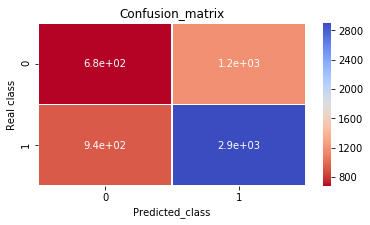

Accuracy:  0.6270563528176408

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           E       0.42      0.36      0.39      1872
           I       0.71      0.76      0.73      3842

    accuracy                           0.63      5714
   macro avg       0.56      0.56      0.56      5714
weighted avg       0.61      0.63      0.62      5714

0.4935407329290799
Accuracy: 62.71%
[13:39:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 820 extra nodes, 0 pruned nodes, max_depth=10
[13:39:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 790 extra nodes, 0 pruned nodes, max_depth=10
[13:39:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 0 pruned nodes, max_depth=10
[13:39:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=10
[13:39:18] INF

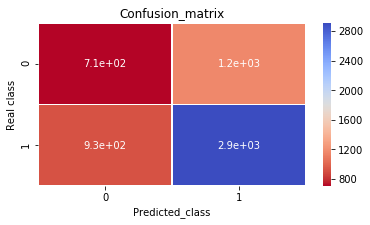

Accuracy:  0.6330066503325166

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           E       0.43      0.38      0.40      1874
           I       0.71      0.76      0.74      3840

    accuracy                           0.63      5714
   macro avg       0.57      0.57      0.57      5714
weighted avg       0.62      0.63      0.63      5714

0.49393779652082237
Accuracy: 63.30%
[13:42:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 674 extra nodes, 0 pruned nodes, max_depth=10
[13:42:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 652 extra nodes, 0 pruned nodes, max_depth=10
[13:42:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 656 extra nodes, 0 pruned nodes, max_depth=10
[13:42:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 666 extra nodes, 0 pruned nodes, max_depth=10
[13:42:37] IN

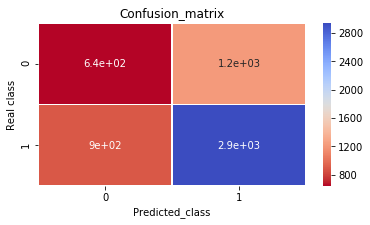

Accuracy:  0.6279313965698284

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           E       0.42      0.34      0.38      1868
           I       0.71      0.77      0.73      3846

    accuracy                           0.63      5714
   macro avg       0.56      0.56      0.56      5714
weighted avg       0.61      0.63      0.62      5714

0.49274597731469266
Accuracy: 62.79%
[13:45:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 800 extra nodes, 0 pruned nodes, max_depth=10
[13:45:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 688 extra nodes, 0 pruned nodes, max_depth=10
[13:45:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 712 extra nodes, 0 pruned nodes, max_depth=10
[13:45:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 660 extra nodes, 0 pruned nodes, max_depth=10
[13:45:57] IN

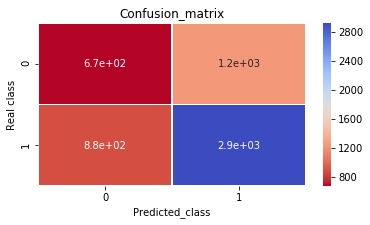

Accuracy:  0.6295064753237661

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           E       0.43      0.35      0.39      1907
           I       0.70      0.77      0.73      3807

    accuracy                           0.63      5714
   macro avg       0.57      0.56      0.56      5714
weighted avg       0.61      0.63      0.62      5714

0.5004592573153129
Accuracy: 62.95%
[13:49:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 918 extra nodes, 0 pruned nodes, max_depth=10
[13:49:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 942 extra nodes, 0 pruned nodes, max_depth=10
[13:49:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 900 extra nodes, 0 pruned nodes, max_depth=10
[13:49:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 884 extra nodes, 0 pruned nodes, max_depth=10
[13:49:15] INF

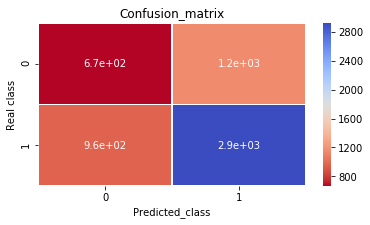

Accuracy:  0.6289165062138982

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           E       0.41      0.36      0.39      1828
           I       0.72      0.75      0.73      3885

    accuracy                           0.63      5713
   macro avg       0.56      0.56      0.56      5713
weighted avg       0.62      0.63      0.62      5713

0.48481633735578833
Accuracy: 62.89%
[13:52:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 984 extra nodes, 0 pruned nodes, max_depth=10
[13:52:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 962 extra nodes, 0 pruned nodes, max_depth=10
[13:52:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 928 extra nodes, 0 pruned nodes, max_depth=10
[13:52:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 954 extra nodes, 0 pruned nodes, max_depth=10
[13:52:34] IN

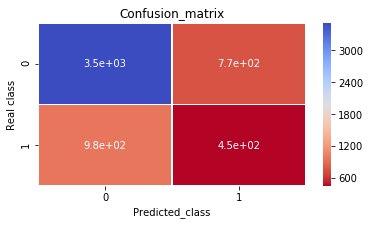

Accuracy:  0.6946097304865243

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           N       0.78      0.82      0.80      4289
           S       0.37      0.32      0.34      1425

    accuracy                           0.69      5714
   macro avg       0.58      0.57      0.57      5714
weighted avg       0.68      0.69      0.69      5714

0.3992155764112621
Accuracy: 69.46%
[13:56:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 924 extra nodes, 0 pruned nodes, max_depth=10
[13:56:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 892 extra nodes, 0 pruned nodes, max_depth=10
[13:56:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 914 extra nodes, 0 pruned nodes, max_depth=10
[13:56:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 912 extra nodes, 0 pruned nodes, max_depth=10
[13:56:11] INF

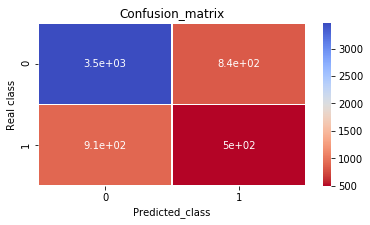

Accuracy:  0.6937346867343367

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           N       0.79      0.81      0.80      4308
           S       0.37      0.35      0.36      1406

    accuracy                           0.69      5714
   macro avg       0.58      0.58      0.58      5714
weighted avg       0.69      0.69      0.69      5714

0.3949438202247191
Accuracy: 69.37%
[13:59:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 852 extra nodes, 0 pruned nodes, max_depth=10
[13:59:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 0 pruned nodes, max_depth=10
[13:59:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 804 extra nodes, 0 pruned nodes, max_depth=10
[13:59:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=10
[13:59:46] INF

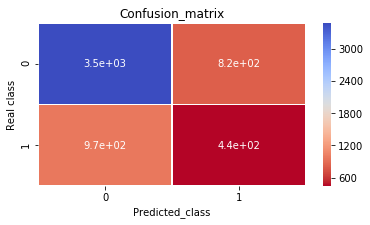

Accuracy:  0.6872593629681484

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           N       0.78      0.81      0.80      4302
           S       0.35      0.32      0.33      1412

    accuracy                           0.69      5714
   macro avg       0.57      0.56      0.56      5714
weighted avg       0.68      0.69      0.68      5714

0.39629525680606226
Accuracy: 68.73%
[14:03:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 966 extra nodes, 0 pruned nodes, max_depth=10
[14:03:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 898 extra nodes, 0 pruned nodes, max_depth=10
[14:03:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=10
[14:03:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 932 extra nodes, 0 pruned nodes, max_depth=10
[14:03:23] IN

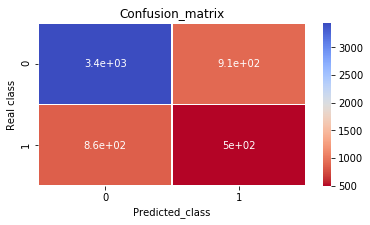

Accuracy:  0.6891844592229611

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           N       0.80      0.79      0.79      4352
           S       0.35      0.37      0.36      1362

    accuracy                           0.69      5714
   macro avg       0.58      0.58      0.58      5714
weighted avg       0.69      0.69      0.69      5714

0.38496325607687953
Accuracy: 68.92%
[14:06:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=10
[14:06:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 0 pruned nodes, max_depth=10
[14:06:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=10
[14:06:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 0 pruned nodes, max_depth=10
[14:07:00] IN

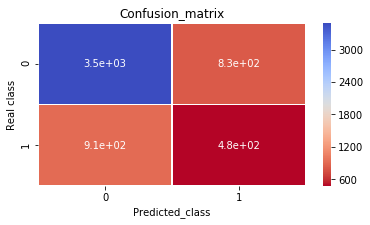

Accuracy:  0.6950813933134955

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           N       0.79      0.81      0.80      4323
           S       0.37      0.34      0.35      1390

    accuracy                           0.70      5713
   macro avg       0.58      0.58      0.58      5713
weighted avg       0.69      0.70      0.69      5713

0.3913839222863579
Accuracy: 69.51%
[14:10:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1044 extra nodes, 0 pruned nodes, max_depth=10
[14:10:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 966 extra nodes, 0 pruned nodes, max_depth=10
[14:10:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 986 extra nodes, 0 pruned nodes, max_depth=10
[14:10:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1004 extra nodes, 0 pruned nodes, max_depth=10
[14:10:34] I

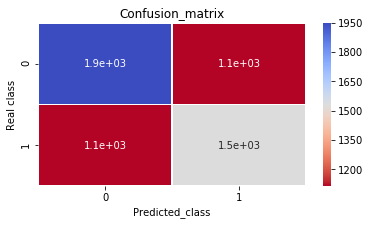

Accuracy:  0.6088554427721387

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           F       0.64      0.64      0.64      3068
           T       0.58      0.58      0.58      2646

    accuracy                           0.61      5714
   macro avg       0.61      0.61      0.61      5714
weighted avg       0.61      0.61      0.61      5714

0.6987018902300159
Accuracy: 60.89%
[14:13:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 954 extra nodes, 0 pruned nodes, max_depth=10
[14:13:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 924 extra nodes, 0 pruned nodes, max_depth=10
[14:13:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 922 extra nodes, 0 pruned nodes, max_depth=10
[14:13:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 948 extra nodes, 0 pruned nodes, max_depth=10
[14:13:22] INF

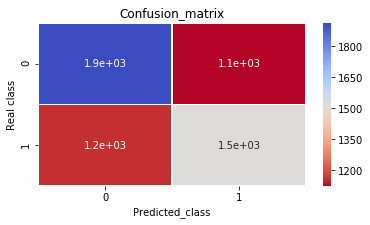

Accuracy:  0.599929996499825

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           F       0.62      0.63      0.63      3039
           T       0.57      0.57      0.57      2675

    accuracy                           0.60      5714
   macro avg       0.60      0.60      0.60      5714
weighted avg       0.60      0.60      0.60      5714

0.6377398974848015
Accuracy: 59.99%
[14:16:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1026 extra nodes, 0 pruned nodes, max_depth=10
[14:16:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 970 extra nodes, 0 pruned nodes, max_depth=10
[14:16:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1078 extra nodes, 0 pruned nodes, max_depth=10
[14:16:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 932 extra nodes, 0 pruned nodes, max_depth=10
[14:16:09] IN

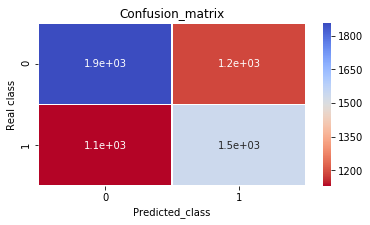

Accuracy:  0.5941547077353868

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           F       0.62      0.61      0.62      3045
           T       0.56      0.58      0.57      2669

    accuracy                           0.59      5714
   macro avg       0.59      0.59      0.59      5714
weighted avg       0.59      0.59      0.59      5714

0.6367648813074078
Accuracy: 59.42%
[14:18:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1006 extra nodes, 0 pruned nodes, max_depth=10
[14:18:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 960 extra nodes, 0 pruned nodes, max_depth=10
[14:18:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 968 extra nodes, 0 pruned nodes, max_depth=10
[14:18:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 990 extra nodes, 0 pruned nodes, max_depth=10
[14:18:56] IN

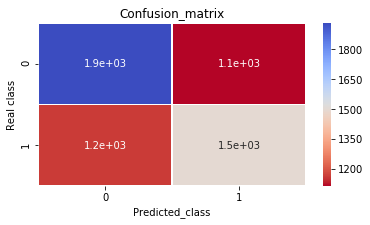

Accuracy:  0.6013300665033252

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           F       0.62      0.63      0.63      3049
           T       0.57      0.56      0.57      2665

    accuracy                           0.60      5714
   macro avg       0.60      0.60      0.60      5714
weighted avg       0.60      0.60      0.60      5714

0.6958804062535662
Accuracy: 60.13%
[14:21:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1044 extra nodes, 0 pruned nodes, max_depth=10
[14:21:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1060 extra nodes, 0 pruned nodes, max_depth=10
[14:21:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 974 extra nodes, 0 pruned nodes, max_depth=10
[14:21:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1024 extra nodes, 0 pruned nodes, max_depth=10
[14:21:46] 

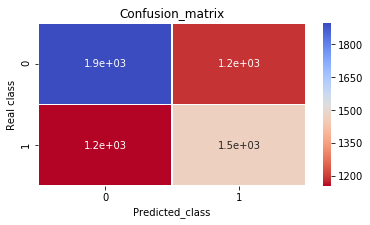

Accuracy:  0.5895326448450902

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           F       0.62      0.61      0.62      3088
           T       0.55      0.56      0.56      2625

    accuracy                           0.59      5713
   macro avg       0.59      0.59      0.59      5713
weighted avg       0.59      0.59      0.59      5713

0.6296473974574239
Accuracy: 58.95%
[14:24:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 704 extra nodes, 0 pruned nodes, max_depth=10
[14:24:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 0 pruned nodes, max_depth=10
[14:24:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 686 extra nodes, 0 pruned nodes, max_depth=10
[14:24:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 724 extra nodes, 0 pruned nodes, max_depth=10
[14:24:34] INF

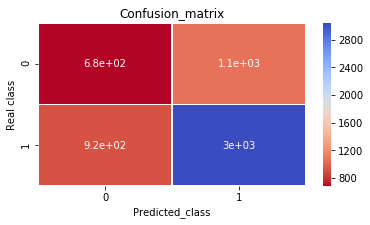

Accuracy:  0.652607630381519

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           J       0.43      0.39      0.41      1746
           P       0.74      0.77      0.75      3968

    accuracy                           0.65      5714
   macro avg       0.58      0.58      0.58      5714
weighted avg       0.64      0.65      0.65      5714

0.4680965147453083
Accuracy: 65.26%
[14:27:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 786 extra nodes, 0 pruned nodes, max_depth=10
[14:27:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 762 extra nodes, 0 pruned nodes, max_depth=10
[14:27:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 0 pruned nodes, max_depth=10
[14:27:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 0 pruned nodes, max_depth=10
[14:27:54] INFO

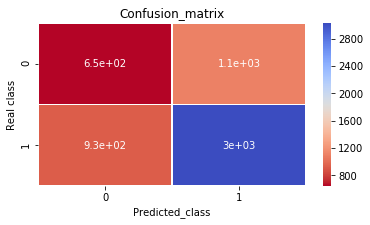

Accuracy:  0.6436821841092054

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           J       0.41      0.37      0.39      1752
           P       0.73      0.77      0.75      3962

    accuracy                           0.64      5714
   macro avg       0.57      0.57      0.57      5714
weighted avg       0.63      0.64      0.64      5714

0.4693276185373694
Accuracy: 64.37%
[14:31:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 0 pruned nodes, max_depth=10
[14:31:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 786 extra nodes, 0 pruned nodes, max_depth=10
[14:31:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes, 0 pruned nodes, max_depth=10
[14:31:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 0 pruned nodes, max_depth=10
[14:31:15] INF

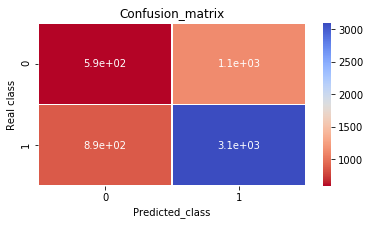

Accuracy:  0.6463073153657682

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           J       0.40      0.34      0.37      1729
           P       0.73      0.78      0.75      3985

    accuracy                           0.65      5714
   macro avg       0.57      0.56      0.56      5714
weighted avg       0.63      0.65      0.64      5714

0.46459760849119985
Accuracy: 64.63%
[14:34:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 788 extra nodes, 0 pruned nodes, max_depth=10
[14:34:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 0 pruned nodes, max_depth=10
[14:34:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 756 extra nodes, 0 pruned nodes, max_depth=10
[14:34:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 0 pruned nodes, max_depth=10
[14:34:36] IN

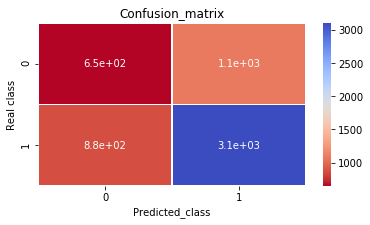

Accuracy:  0.6573328666433321

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           J       0.43      0.37      0.40      1731
           P       0.74      0.78      0.76      3983

    accuracy                           0.66      5714
   macro avg       0.58      0.58      0.58      5714
weighted avg       0.65      0.66      0.65      5714

0.46501007387508403
Accuracy: 65.73%
[14:37:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 0 pruned nodes, max_depth=10
[14:37:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 0 pruned nodes, max_depth=10
[14:37:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 0 pruned nodes, max_depth=10
[14:37:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 0 pruned nodes, max_depth=10
[14:37:57] IN

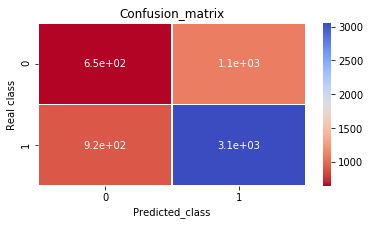

Accuracy:  0.6481708384386486

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           J       0.41      0.37      0.39      1740
           P       0.74      0.77      0.75      3973

    accuracy                           0.65      5713
   macro avg       0.58      0.57      0.57      5713
weighted avg       0.64      0.65      0.64      5713

0.4669260700389105
Accuracy: 64.82%
[14:41:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 0 pruned nodes, max_depth=10
[14:41:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 822 extra nodes, 0 pruned nodes, max_depth=10
[14:41:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 0 pruned nodes, max_depth=10
[14:41:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 804 extra nodes, 0 pruned nodes, max_depth=10
[14:41:19] INF

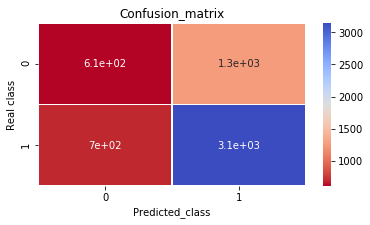

Accuracy:  0.6573328666433321

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           E       0.47      0.33      0.38      1872
           I       0.71      0.82      0.76      3842

    accuracy                           0.66      5714
   macro avg       0.59      0.57      0.57      5714
weighted avg       0.63      0.66      0.64      5714

0.4935407329290799
Accuracy: 65.73%
[14:44:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 968 extra nodes, 0 pruned nodes, max_depth=10
[14:44:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 946 extra nodes, 0 pruned nodes, max_depth=10
[14:44:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 932 extra nodes, 0 pruned nodes, max_depth=10
[14:44:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 946 extra nodes, 0 pruned nodes, max_depth=10
[14:44:42] INF

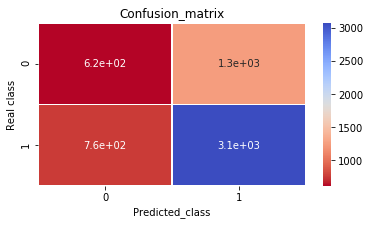

Accuracy:  0.6461323066153307

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           E       0.45      0.33      0.38      1874
           I       0.71      0.80      0.75      3840

    accuracy                           0.65      5714
   macro avg       0.58      0.56      0.57      5714
weighted avg       0.62      0.65      0.63      5714

0.49393779652082237
Accuracy: 64.61%
[14:48:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1152 extra nodes, 0 pruned nodes, max_depth=10
[14:48:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1088 extra nodes, 0 pruned nodes, max_depth=10
[14:48:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1134 extra nodes, 0 pruned nodes, max_depth=10
[14:48:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1114 extra nodes, 0 pruned nodes, max_depth=10
[14:48:10

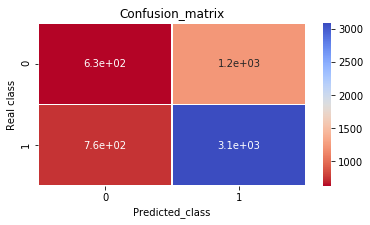

Accuracy:  0.6513825691284564

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           E       0.46      0.34      0.39      1868
           I       0.71      0.80      0.76      3846

    accuracy                           0.65      5714
   macro avg       0.58      0.57      0.57      5714
weighted avg       0.63      0.65      0.64      5714

0.49274597731469266
Accuracy: 65.14%
[14:51:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 874 extra nodes, 0 pruned nodes, max_depth=10
[14:51:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 848 extra nodes, 0 pruned nodes, max_depth=10
[14:51:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 830 extra nodes, 0 pruned nodes, max_depth=10
[14:51:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 850 extra nodes, 0 pruned nodes, max_depth=10
[14:51:35] IN

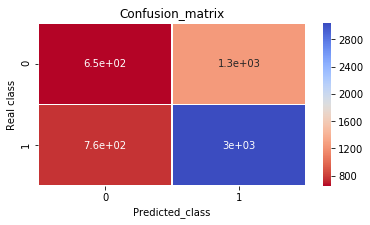

Accuracy:  0.6464823241162058

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           E       0.46      0.34      0.39      1907
           I       0.71      0.80      0.75      3807

    accuracy                           0.65      5714
   macro avg       0.58      0.57      0.57      5714
weighted avg       0.63      0.65      0.63      5714

0.5004592573153129
Accuracy: 64.65%
[14:54:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 998 extra nodes, 0 pruned nodes, max_depth=10
[14:54:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 974 extra nodes, 0 pruned nodes, max_depth=10
[14:54:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 864 extra nodes, 0 pruned nodes, max_depth=10
[14:54:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 870 extra nodes, 0 pruned nodes, max_depth=10
[14:54:59] INF

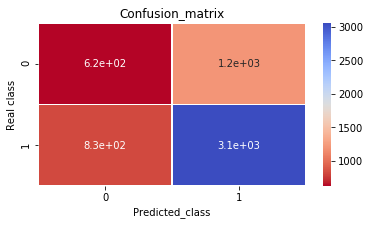

Accuracy:  0.6444950113775599

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           E       0.43      0.34      0.38      1828
           I       0.72      0.79      0.75      3885

    accuracy                           0.64      5713
   macro avg       0.57      0.56      0.57      5713
weighted avg       0.63      0.64      0.63      5713

0.48481633735578833
Accuracy: 64.45%
[14:58:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1014 extra nodes, 0 pruned nodes, max_depth=10
[14:58:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 898 extra nodes, 0 pruned nodes, max_depth=10
[14:58:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 952 extra nodes, 0 pruned nodes, max_depth=10
[14:58:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 904 extra nodes, 0 pruned nodes, max_depth=10
[14:58:22] I

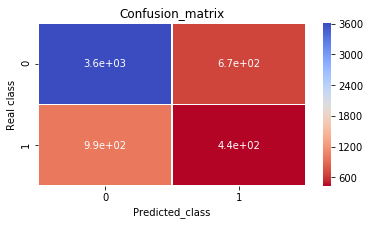

Accuracy:  0.7091354567728386

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           N       0.79      0.84      0.81      4289
           S       0.39      0.31      0.34      1425

    accuracy                           0.71      5714
   macro avg       0.59      0.57      0.58      5714
weighted avg       0.69      0.71      0.70      5714

0.3992155764112621
Accuracy: 70.91%
[15:01:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 902 extra nodes, 0 pruned nodes, max_depth=10
[15:01:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 900 extra nodes, 0 pruned nodes, max_depth=10
[15:01:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 874 extra nodes, 0 pruned nodes, max_depth=10
[15:02:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1046 extra nodes, 0 pruned nodes, max_depth=10
[15:02:02] IN

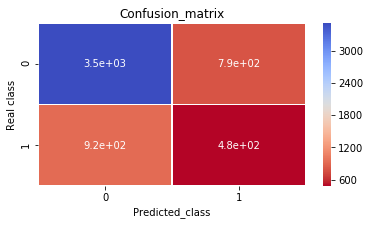

Accuracy:  0.69985999299965

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           N       0.79      0.82      0.80      4308
           S       0.38      0.34      0.36      1406

    accuracy                           0.70      5714
   macro avg       0.59      0.58      0.58      5714
weighted avg       0.69      0.70      0.69      5714

0.3949438202247191
Accuracy: 69.99%
[15:05:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 0 pruned nodes, max_depth=10
[15:05:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=10
[15:05:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 830 extra nodes, 0 pruned nodes, max_depth=10
[15:05:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 836 extra nodes, 0 pruned nodes, max_depth=10
[15:05:42] INFO:

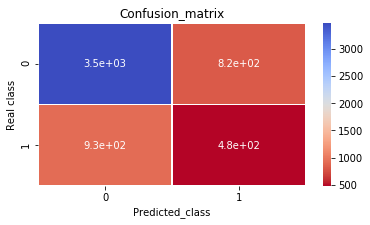

Accuracy:  0.6932096604830241

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           N       0.79      0.81      0.80      4302
           S       0.37      0.34      0.35      1412

    accuracy                           0.69      5714
   macro avg       0.58      0.58      0.58      5714
weighted avg       0.69      0.69      0.69      5714

0.39629525680606226
Accuracy: 69.32%
[15:09:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 996 extra nodes, 0 pruned nodes, max_depth=10
[15:09:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 992 extra nodes, 0 pruned nodes, max_depth=10
[15:09:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 988 extra nodes, 0 pruned nodes, max_depth=10
[15:09:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 968 extra nodes, 0 pruned nodes, max_depth=10
[15:09:20] IN

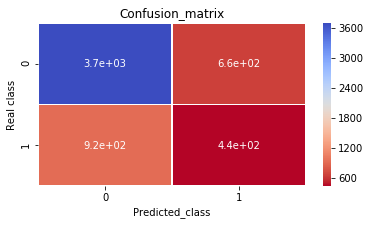

Accuracy:  0.7229611480574029

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           N       0.80      0.85      0.82      4352
           S       0.40      0.32      0.36      1362

    accuracy                           0.72      5714
   macro avg       0.60      0.58      0.59      5714
weighted avg       0.70      0.72      0.71      5714

0.38496325607687953
Accuracy: 72.30%
[15:12:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 992 extra nodes, 0 pruned nodes, max_depth=10
[15:12:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1000 extra nodes, 0 pruned nodes, max_depth=10
[15:12:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 990 extra nodes, 0 pruned nodes, max_depth=10
[15:12:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1072 extra nodes, 0 pruned nodes, max_depth=10
[15:13:00] 

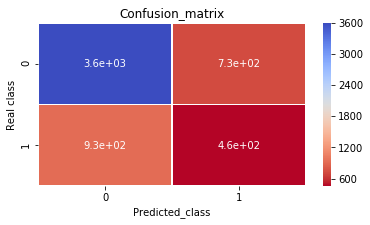

Accuracy:  0.7092595834062664

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           N       0.79      0.83      0.81      4323
           S       0.39      0.33      0.36      1390

    accuracy                           0.71      5713
   macro avg       0.59      0.58      0.58      5713
weighted avg       0.69      0.71      0.70      5713

0.3913839222863579
Accuracy: 70.93%
[15:16:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 988 extra nodes, 0 pruned nodes, max_depth=10
[15:16:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 944 extra nodes, 0 pruned nodes, max_depth=10
[15:16:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 956 extra nodes, 0 pruned nodes, max_depth=10
[15:16:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 976 extra nodes, 0 pruned nodes, max_depth=10
[15:16:35] INF

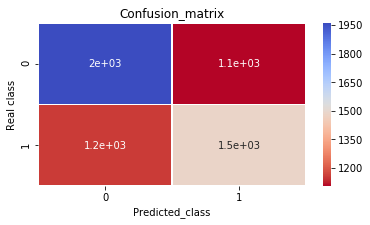

Accuracy:  0.603605180259013

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           F       0.63      0.64      0.63      3068
           T       0.57      0.56      0.57      2646

    accuracy                           0.60      5714
   macro avg       0.60      0.60      0.60      5714
weighted avg       0.60      0.60      0.60      5714

0.6987018902300159
Accuracy: 60.36%
[15:19:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1116 extra nodes, 0 pruned nodes, max_depth=10
[15:19:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1066 extra nodes, 0 pruned nodes, max_depth=10
[15:19:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1068 extra nodes, 0 pruned nodes, max_depth=10
[15:19:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1032 extra nodes, 0 pruned nodes, max_depth=10
[15:19:22] 

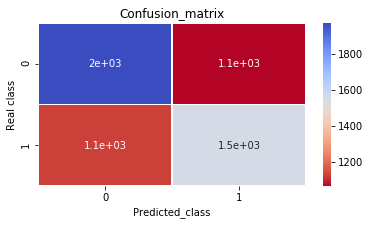

Accuracy:  0.6162058102905146

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           F       0.64      0.65      0.64      3039
           T       0.59      0.58      0.59      2675

    accuracy                           0.62      5714
   macro avg       0.61      0.61      0.61      5714
weighted avg       0.62      0.62      0.62      5714

0.6377398974848015
Accuracy: 61.62%
[15:22:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1066 extra nodes, 0 pruned nodes, max_depth=10
[15:22:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1040 extra nodes, 0 pruned nodes, max_depth=10
[15:22:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1042 extra nodes, 0 pruned nodes, max_depth=10
[15:22:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1034 extra nodes, 0 pruned nodes, max_depth=10
[15:22:10]

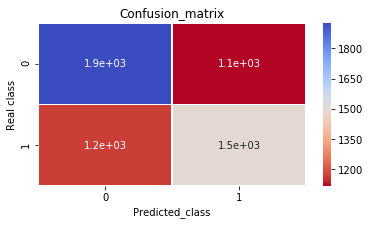

Accuracy:  0.5997549877493875

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           F       0.62      0.63      0.63      3045
           T       0.57      0.56      0.57      2669

    accuracy                           0.60      5714
   macro avg       0.60      0.60      0.60      5714
weighted avg       0.60      0.60      0.60      5714

0.6367648813074078
Accuracy: 59.98%
[15:24:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1144 extra nodes, 0 pruned nodes, max_depth=10
[15:24:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1128 extra nodes, 0 pruned nodes, max_depth=10
[15:24:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1098 extra nodes, 0 pruned nodes, max_depth=10
[15:24:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1022 extra nodes, 0 pruned nodes, max_depth=10
[15:24:58]

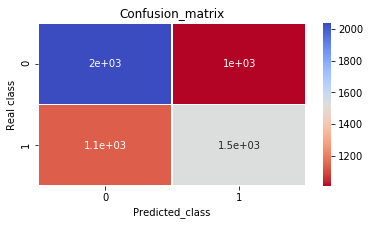

Accuracy:  0.6242562128106406

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           F       0.64      0.67      0.66      3049
           T       0.60      0.57      0.59      2665

    accuracy                           0.62      5714
   macro avg       0.62      0.62      0.62      5714
weighted avg       0.62      0.62      0.62      5714

0.6958804062535662
Accuracy: 62.43%
[15:27:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1066 extra nodes, 0 pruned nodes, max_depth=10
[15:27:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1040 extra nodes, 0 pruned nodes, max_depth=10
[15:27:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 924 extra nodes, 0 pruned nodes, max_depth=10
[15:27:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1030 extra nodes, 0 pruned nodes, max_depth=10
[15:27:48] 

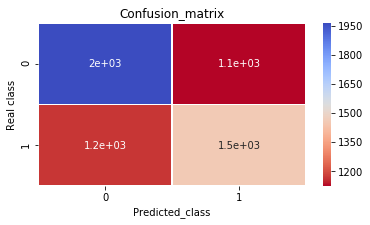

Accuracy:  0.5989847715736041

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           F       0.63      0.64      0.63      3088
           T       0.56      0.56      0.56      2625

    accuracy                           0.60      5713
   macro avg       0.60      0.60      0.60      5713
weighted avg       0.60      0.60      0.60      5713

0.6296473974574239
Accuracy: 59.90%
[15:30:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1032 extra nodes, 0 pruned nodes, max_depth=10
[15:30:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 864 extra nodes, 0 pruned nodes, max_depth=10
[15:30:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1006 extra nodes, 0 pruned nodes, max_depth=10
[15:30:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 862 extra nodes, 0 pruned nodes, max_depth=10
[15:30:36] I

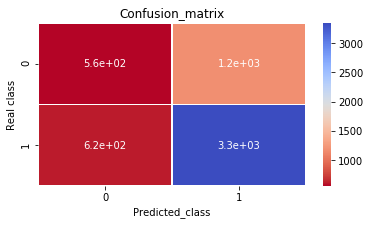

Accuracy:  0.684109205460273

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           J       0.47      0.32      0.38      1746
           P       0.74      0.84      0.79      3968

    accuracy                           0.68      5714
   macro avg       0.61      0.58      0.59      5714
weighted avg       0.66      0.68      0.66      5714

0.4680965147453083
Accuracy: 68.41%
[15:33:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 898 extra nodes, 0 pruned nodes, max_depth=10
[15:33:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 862 extra nodes, 0 pruned nodes, max_depth=10
[15:33:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 880 extra nodes, 0 pruned nodes, max_depth=10
[15:34:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 874 extra nodes, 0 pruned nodes, max_depth=10
[15:34:02] INFO

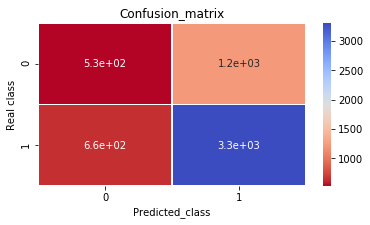

Accuracy:  0.6711585579278964

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           J       0.45      0.30      0.36      1752
           P       0.73      0.83      0.78      3962

    accuracy                           0.67      5714
   macro avg       0.59      0.57      0.57      5714
weighted avg       0.64      0.67      0.65      5714

0.4693276185373694
Accuracy: 67.12%
[15:37:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1024 extra nodes, 0 pruned nodes, max_depth=10
[15:37:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1000 extra nodes, 0 pruned nodes, max_depth=10
[15:37:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1010 extra nodes, 0 pruned nodes, max_depth=10
[15:37:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 992 extra nodes, 0 pruned nodes, max_depth=10
[15:37:28] 

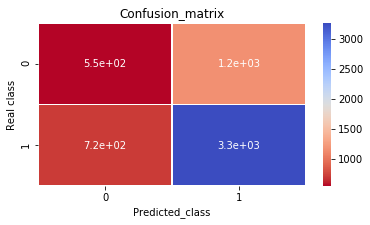

Accuracy:  0.6681834091704585

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           J       0.43      0.32      0.37      1729
           P       0.74      0.82      0.77      3985

    accuracy                           0.67      5714
   macro avg       0.58      0.57      0.57      5714
weighted avg       0.64      0.67      0.65      5714

0.46459760849119985
Accuracy: 66.82%
[15:40:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1016 extra nodes, 0 pruned nodes, max_depth=10
[15:40:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 964 extra nodes, 0 pruned nodes, max_depth=10
[15:40:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1010 extra nodes, 0 pruned nodes, max_depth=10
[15:40:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1024 extra nodes, 0 pruned nodes, max_depth=10
[15:40:53]

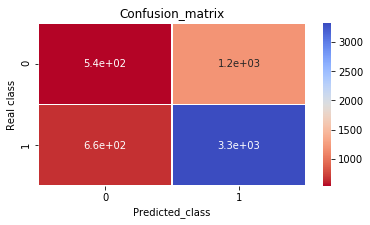

Accuracy:  0.676058802940147

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           J       0.45      0.31      0.37      1731
           P       0.74      0.84      0.78      3983

    accuracy                           0.68      5714
   macro avg       0.59      0.57      0.57      5714
weighted avg       0.65      0.68      0.66      5714

0.46501007387508403
Accuracy: 67.61%
[15:44:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=10
[15:44:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=10
[15:44:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 854 extra nodes, 0 pruned nodes, max_depth=10
[15:44:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 856 extra nodes, 0 pruned nodes, max_depth=10
[15:44:20] INF

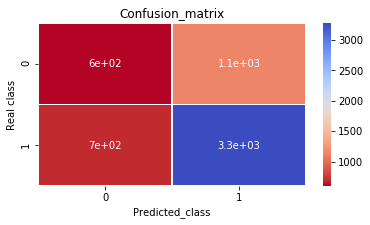

Accuracy:  0.6788027306143882

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           J       0.46      0.35      0.40      1740
           P       0.74      0.82      0.78      3973

    accuracy                           0.68      5713
   macro avg       0.60      0.59      0.59      5713
weighted avg       0.66      0.68      0.66      5713

0.4669260700389105
Accuracy: 67.88%


In [0]:
#넣고 싶은 embedding 선택
embedding_list=[['ft_cbow_avg'],['ft_skip_gram_avg']] #'ft_cbow_avg', 'ft_skip_gram_avg'
letter_list=["L1","L2","L3","L4"]
for embed in embedding_list:
  X = make_input(embed)
  X.replace([np.nan,np.inf,-np.inf],0,inplace=True)
  score_list= []
  for l in letter_list:
    y = df[l]
    kf = KFold(5, shuffle=True, random_state=0)
    cv = 0
    #트리 기반 모델은 더미화 필요 없음으로 kf.split(raw_data)으로 진행
    for idx_train, idx_test in kf.split(X):  
      cv += 1
      X_train = X.iloc[idx_train]
      y_train = y.iloc[idx_train]
      X_test = X.iloc[idx_test]
      y_test = y.iloc[idx_test]

      namename = "{}_cv{}_{}".format(embedding_list[0],cv,l)
      #샘플링 함수 선택 (3줄 중 하나 골라서)
      #X1, y1 = unersampling(X_train,y_train)
      X1, y1 = oversampling(X_train, y_train)
      #X1, y1 = make_SMOTE(X, y)

      #XG-boost model
      gbm = xgb.XGBClassifier(max_depth=10, min_child_weight=1, learning_rate=0.01, verbosity=2, random_state = 0)
      gbm.fit(X1, y1)

      #예측
      y_pred = gbm.predict(X_test)

      #결과보고
      print('CV# ', cv)
      score_report(y_test,y_pred,namename)
      accuracy = accuracy_score(y_test, y_pred)
      cls_r = classification_report(y_test,y_pred)
      y_test = [0 if x == list(set(y_test))[0] else 1 for x in y_test]
      y_pred = [0 if x == list(set(y_test))[0] else 1 for x in y_pred]
      f1 = f1_score(y_test, y_pred, average='binary')
      print(f1)
      score_list.append([namename,accuracy,f1,cls_r])
      
      print("Accuracy: %.2f%%" % (accuracy * 100.0))

      #모델 저장
      with open('gbm_{}.pickle'.format(namename), 'wb') as handle:
        pickle.dump(gbm, handle, protocol=pickle.HIGHEST_PROTOCOL)
  with open('{}.pickle'.format(embed), 'wb') as handle:
        pickle.dump(pd.DataFrame(score_list), handle, protocol=pickle.HIGHEST_PROTOCOL)


In [0]:
with open("['bert'].pickle", 'rb') as f:
    bert = pickle.load(f)
bert

,0,1,2,3
0,['bert']_cv1_L1,0.586629,0.493541,precision recall f1-score ...
1,['bert']_cv2_L1,0.608330,0.493938,precision recall f1-score ...
2,['bert']_cv3_L1,0.587504,0.492746,precision recall f1-score ...
3,['bert']_cv4_L1,0.592405,0.500459,precision recall f1-score ...
4,['bert']_cv5_L1,0.575354,0.484816,precision recall f1-score ...
5,['bert']_cv1_L2,0.684984,0.399216,precision recall f1-score ...
6,['bert']_cv2_L2,0.677984,0.394944,precision recall f1-score ...
7,['bert']_cv3_L2,0.669933,0.396295,precision recall f1-score ...
8,['bert']_cv4_L2,0.686734,0.384963,precision recall f1-score ...
9,['bert']_cv5_L2,0.683529,0.391384,precision recall f1-score ...


In [0]:
ft_cbow_avg

,0,1,2,3
0,['ft_cbow_avg']_cv1_L1,0.637732,0.493541,precision recall f1-score ...
1,['ft_cbow_avg']_cv2_L1,0.628981,0.493938,precision recall f1-score ...
2,['ft_cbow_avg']_cv3_L1,0.626356,0.492746,precision recall f1-score ...
3,['ft_cbow_avg']_cv4_L1,0.621106,0.500459,precision recall f1-score ...
4,['ft_cbow_avg']_cv5_L1,0.633818,0.484816,precision recall f1-score ...
5,['ft_cbow_avg']_cv1_L2,0.695835,0.399216,precision recall f1-score ...
6,['ft_cbow_avg']_cv2_L2,0.690410,0.394944,precision recall f1-score ...
7,['ft_cbow_avg']_cv3_L2,0.692335,0.396295,precision recall f1-score ...
8,['ft_cbow_avg']_cv4_L2,0.710361,0.384963,precision recall f1-score ...
9,['ft_cbow_avg']_cv5_L2,0.690530,0.391384,precision recall f1-score ...


In [0]:
with open("['ft_cbow_avg'].pickle", 'rb') as f:
    ft_cbow_avg = pickle.load(f)

In [0]:
# modeling
gbm = xgb.XGBClassifier(max_depth=25, min_child_weight=1, learning_rate=0.1, verbosity=2, random_state = 0)
gbm.fit(X_train, y_train)

In [0]:
# 만들어놓은 모델 가져오기
with open('xgb_doc2vec_PV_DBOW_IE.pickle', 'rb') as f:
    gbm = pickle.load(f)

In [0]:
y_pred = gbm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.62%


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2054,  748],
       [  56, 5713]])

# L2: N vs S

In [0]:
y2.unique()

array(['S', 'N'], dtype=object)

In [0]:
X_train, X_test , y_train, y_test = train_test_split(X,y2, test_size=0.3, random_state = 0)

In [0]:
# modeling
gbm = xgb.XGBClassifier(max_depth=25, min_child_weight=1, learning_rate=0.1, verbosity=2, random_state = 0)
gbm.fit(X_train, y_train)

[06:10:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2824 extra nodes, 0 pruned nodes, max_depth=25
[06:10:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2474 extra nodes, 0 pruned nodes, max_depth=25
[06:10:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2532 extra nodes, 0 pruned nodes, max_depth=25
[06:10:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2512 extra nodes, 0 pruned nodes, max_depth=25
[06:10:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2572 extra nodes, 0 pruned nodes, max_depth=25
[06:10:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2604 extra nodes, 0 pruned nodes, max_depth=25
[06:10:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2646 extra nodes, 0 pruned nodes, max_depth=25
[06:10:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

In [0]:
with open('xgb_doc2vec_PV_DBOW_NS.pickle', 'wb') as handle:
    pickle.dump(gbm, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
y_pred = gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.64%


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6364,   60],
       [2028,  119]])

# L3: T vs F

In [0]:
y3.unique()

array(['F', 'T'], dtype=object)

In [0]:
X_train, X_test , y_train, y_test = train_test_split(X,y3, test_size=0.3, random_state = 0)

In [0]:
# modeling
gbm = xgb.XGBClassifier(max_depth=25, min_child_weight=1, learning_rate=0.1, verbosity=2, random_state = 0)
gbm.fit(X_train, y_train)

[06:14:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3486 extra nodes, 0 pruned nodes, max_depth=25
[06:14:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3138 extra nodes, 0 pruned nodes, max_depth=24
[06:14:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3166 extra nodes, 0 pruned nodes, max_depth=20
[06:14:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3146 extra nodes, 0 pruned nodes, max_depth=25
[06:14:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3184 extra nodes, 0 pruned nodes, max_depth=23
[06:14:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3166 extra nodes, 0 pruned nodes, max_depth=22
[06:14:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3118 extra nodes, 0 pruned nodes, max_depth=23
[06:14:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

In [0]:
with open('xgb_doc2vec_PV_DBOW_TF.pickle', 'wb') as handle:
    pickle.dump(gbm, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
y_pred = gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.01%


In [0]:
confusion_matrix(y_test, y_pred)

array([[3327, 1256],
       [1829, 2159]])

# L4: P vs J

In [0]:
y4.unique()

array(['P', 'J'], dtype=object)

In [0]:
X_train, X_test , y_train, y_test = train_test_split(X,y4, test_size=0.3, random_state = 0)

In [0]:
# modeling
gbm = xgb.XGBClassifier(max_depth=25, min_child_weight=1, learning_rate=0.1, verbosity=2, random_state = 0)
gbm.fit(X_train, y_train)

[06:19:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3012 extra nodes, 0 pruned nodes, max_depth=25
[06:19:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2748 extra nodes, 0 pruned nodes, max_depth=25
[06:19:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2780 extra nodes, 0 pruned nodes, max_depth=25
[06:19:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2756 extra nodes, 0 pruned nodes, max_depth=25
[06:19:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2822 extra nodes, 0 pruned nodes, max_depth=25
[06:19:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2890 extra nodes, 0 pruned nodes, max_depth=25
[06:19:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2870 extra nodes, 0 pruned nodes, max_depth=25
[06:19:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

In [0]:
with open('xgb_doc2vec_PV_DBOW_PJ.pickle', 'wb') as handle:
    pickle.dump(gbm, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
y_pred = gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.78%


In [0]:
confusion_matrix(y_test, y_pred)

array([[ 339, 2275],
       [ 144, 5813]])